<a href="https://colab.research.google.com/github/sal0m/WellnessBuddyBot/blob/main/%D0%98%D0%98_%D0%94%D0%97_2_(%D0%9E%D0%91%D0%AF%D0%97%D0%90%D0%A2%D0%95%D0%9B%D0%AC%D0%9D%D0%9E%D0%95).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Telegram-бот для расчёта нормы воды, калорий и трекинга активности

**Описание задания:**  
Ваша задача — создать Telegram-бота, который помогает пользователю рассчитать дневные нормы воды и калорий, а также отслеживать тренировки и питание.

### Цели задания:

1. **Рассчитать индивидуальные дневные нормы воды и калорий:**
   - Учитывайте параметры пользователя, уровень активности, текущую погоду и потребляемую еду.
   - Используйте реальные данные продуктов через API или иным способом.

2. **Добавить функции трекинга:**
   - Логировать тренировки и пересчитывать расход калорий.
   - Логировать питание и добавлять потреблённые калории в расчёты.

3. **Создать интерактивный Telegram-бот:**
   - Настройка профиля (вес, активность, город).
   - Отчёт о текущем прогрессе по воде и калориям.

### Описание функционала

#### 1. **Настройка профиля пользователя:**
   - Команда `/set_profile` запрашивает:
     - Вес (в кг), рост (в см) и возраст.
     - Уровень активности (минуты в день).
     - Город (для получения температуры).
     - Цель калорий (по умолчанию рассчитывается, но можно задавать вручную).
     - Любые параметры по вашему усмотрению.

   - Пример:
     ```
     Бот: Введите ваш вес (в кг):
     Пользователь: 80
     Бот: Введите ваш рост (в см):
     Пользователь: 184
     Бот: Введите ваш возраст:
     Пользователь: 26
     Бот: Сколько минут активности у вас в день?
     Пользователь: 45
     Бот: В каком городе вы находитесь?
     Пользователь: Moscow
     ```

#### 2. **Примеры расчёта дневных норм:**
   - **Норма воды:**
     
$\text{Базовая норма} = \text{Вес} \times 30 \, \text{мл/кг}$  
$+ 500 \, \text{мл}$ за каждые 30 минут активности.  
$+ 500-1000 \, \text{мл}$ за жаркую погоду (> 25°C).

   - **Норма калорий:**
     
$\text{Калории} = 10 \times \text{Вес (кг)} + 6.25 \times \text{Рост (см)} - 5 \times \text{Возраст}$
     
$\text{+ Уровень активности добавляет калории (200-400 в зависимости от времени и типа тренировки). Можете указать формулу на свой выбор}$

   - Можете использовать другие формулы по желанию. Можете использовать в расчётах другие параметры, запрашиваемые у пользователя, например, пол.

#### 3. **Логирование воды:**
   - Команда `/log_water <количество>`:
     - Сохраняет, сколько воды выпито.
     - Показывает, сколько осталось до выполнения нормы.

#### 4. **Логирование еды:**
   - Команда `/log_food <название продукта>`:
     - Бот использует API (например, OpenFoodFacts) для получения информации о продукте или иной подход.
     - Сохраняет калорийность.

   - Пример:
     ```
     Пользователь: /log_food банан
     Бот: 🍌 Банан — 89 ккал на 100 г. Сколько грамм вы съели?
     Пользователь: 150
     Бот: Записано: 133.5 ккал.
     ```

#### 5. **Логирование тренировок:**
   - Команда `/log_workout <тип тренировки> <время (мин)>`:
     - Фиксирует сожжённые калории.
     - Учитывает расход воды на тренировке (дополнительные 200 мл за каждые 30 минут) или более умный учет разных типов тренировок.

   - Пример:
     ```
     Пользователь: /log_workout бег 30
     Бот: 🏃‍♂️ Бег 30 минут — 300 ккал. Дополнительно: выпейте 200 мл воды.
     ```

#### 6. **Прогресс по воде и калориям:**
   - Команда `/check_progress`:
     - Показывает, сколько воды и калорий потреблено, сожжено и сколько осталось до выполнения цели.

   - Пример:
     ```
     📊 Прогресс:
     Вода:
     - Выпито: 1500 мл из 2400 мл.
     - Осталось: 900 мл.
     
     Калории:
     - Потреблено: 1800 ккал из 2500 ккал.
     - Сожжено: 400 ккал.
     - Баланс: 1400 ккал.
     ```

#### Пример хранения данных:

Данные пользователя сохраняются в памяти (без базы данных, мы пока это не проходили):
```python
users = {
    "user_id": {
        "weight": 80,
        "height": 184,
        "age": 26,
        "activity": 45,
        "city": "Paris",
        "water_goal": 2400,
        "calorie_goal": 2500,
        "logged_water": 500,
        "logged_calories": 1800,
        "burned_calories": 400
    }
}
```
Если вы знаете как работать с базами данных или имеете желание разобраться с этим до соответствующей лекции, то используйте базу данных, это более правильный подход.

#### Создание бота в Telegram

1. Перейдите к боту `@BotFather` в Telegram.
2. Используйте команду `/newbot` для создания нового бота.
3. Сохраните токен вашего бота.

### Критерии оценивания:

1. Реализован телеграм-бот с помощью выбранной библиотеки, который обрабатывает запросы пользователя и как минимум просто работает – 2 балла.
2. Реализована настройка профиля пользователя с сохранением информации в программе – 1 балл.
3. Реализован корректный расчёт воды и калорий – 0.3 балла. Если в задании есть неопределенность, решите ее по своему выбору.
4. Успешное использование OpenWeatherMap или иного API для погоды (это вы умеете из ДЗ 1) и OpenFoodFacts или иного способа расчета калорийности – 0.2 балла.
5. Бот позволяет фиксировать воду, еду и тренировки, и каждый из этих методов корректно обновляет все состояния и данные – по 1.5 балла за каждый, всего 4.5 балла.
6. Корректно реализован метод, возвращающий прогресс по воде и калориям – 1 балл.
7. Деплой бота на онлайн-сервер, например, на render.com, выполнен корректно. В качестве подтверждения того, что вы успешно задеплоили бота, необходимо прикрепить скриншот с логами, на котором будет видно, что build был успешен. В идеале, чтобы были показаны все команды, которые отправлял пользователь, которые вы будете логировать с помощью, например, middleware, как на лекции – 1 балл.

### Формат сдачи домашнего задания

Сдать в форму необходимо:
1. Ссылку на код.
2. Скриншоты с демонстрацией того как работает ваш телеграм-бот. Должна быть показана работа всех реализованных методов. Проще всего это сделать при локальном деплое.
3. Подтверждение того что вы смогли задеплоить бот на какой-нибудь онлайн ресурс.

Не забудьте удалить ключи API и иную чувствительную информацию.

#### Дополнительная функциональность:

1. **Графики:** Постройте графики прогресса по воде и калориям и реализуйте функциональность бота для пока этих графиков (макс + 2 балла).
2. **Рекомендации:** Бот может предлагать продукты с низким содержанием калорий или тренировки для достижения целей (макс + 1 балл, логику можете предложить любую).
3. **Продвинутое определение калорийности:** Можете реализовать какой-то более умный способ определения калорийности продукта (макс + 2 балла).

**Всего за задание может быть не более 14 баллов.**


#### Для деплоя можете использовать простой Dockerfile
```Dockerfile
FROM python:3.10

WORKDIR /app

COPY requirements.txt requirements.txt
RUN pip install -r requirements.txt

COPY . .

CMD ["python", "bot.py"]
```

Внизу приведены некоторые примеры-подсказки:

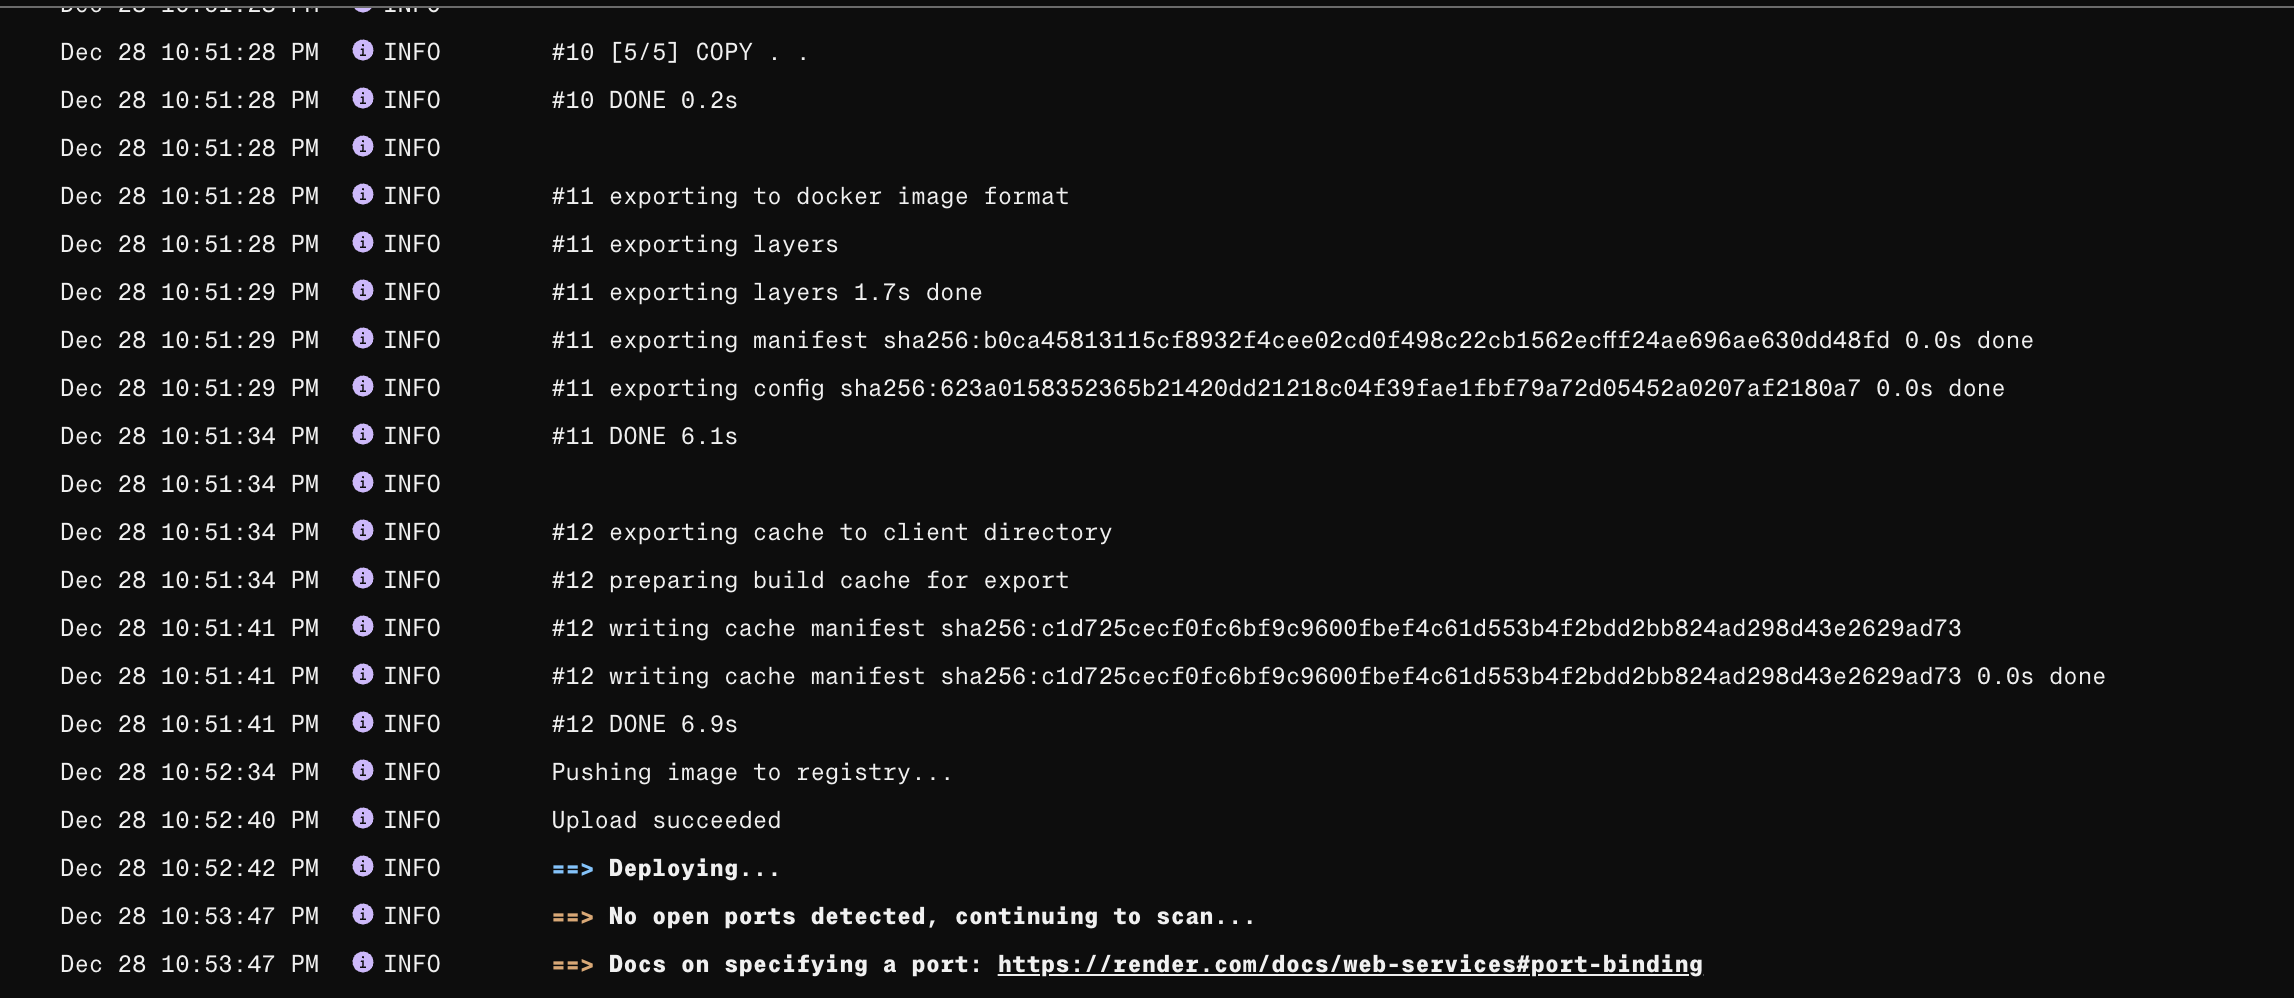

In [ ]:
# Пример подтверждения успешного деплоя
from IPython.display import Image, display
display(Image(filename='/content/image.png'))

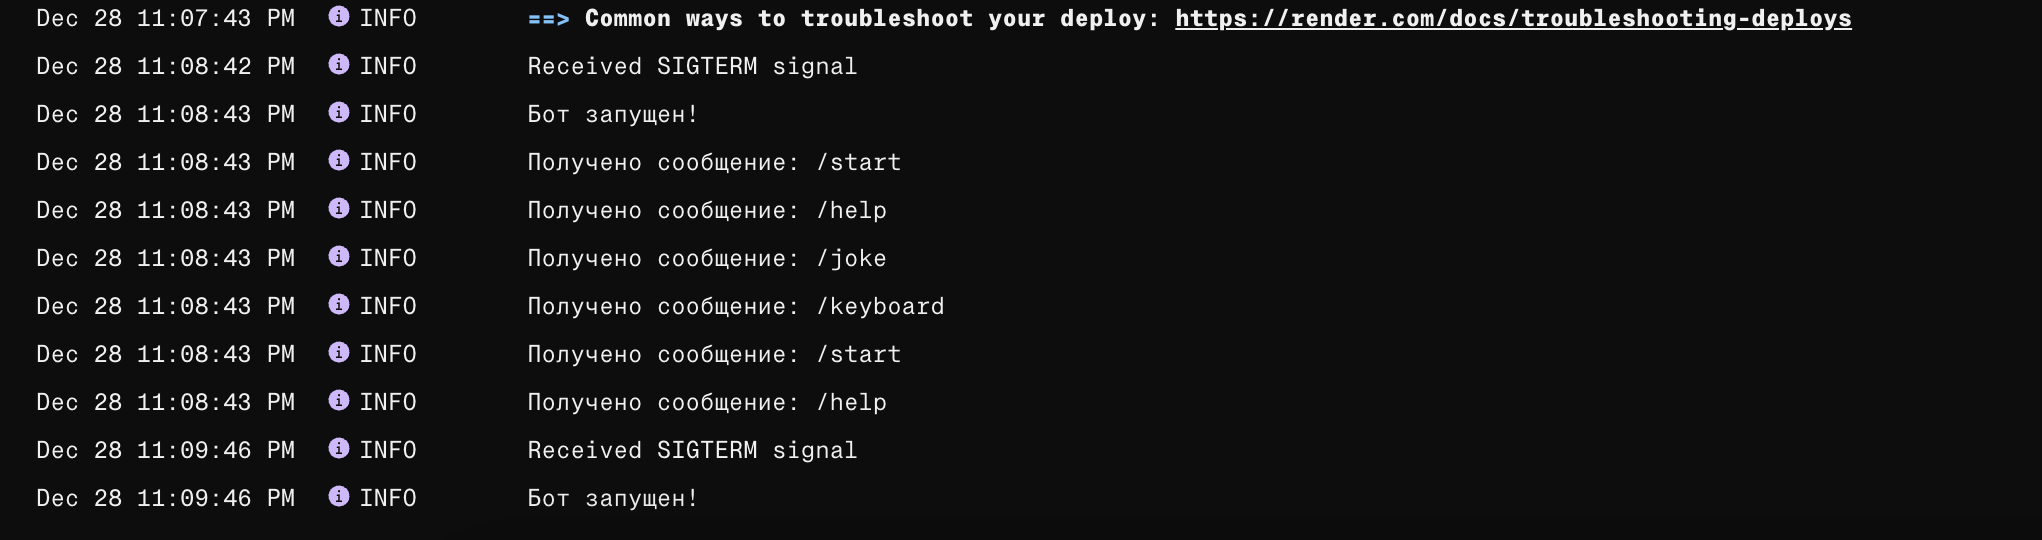

In [ ]:
# Пример логов после деплоя
display(Image(filename='/content/logs.png'))

In [ ]:
# Пример поиска калорийности продукта. Работает так себе и ищет не то что нужно, но для нашего задания пойдет
import requests

def get_food_info(product_name):
    url = f"https://world.openfoodfacts.org/cgi/search.pl?action=process&search_terms={product_name}&json=true"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        products = data.get('products', [])
        if products:  # Проверяем, есть ли найденные продукты
            first_product = products[0]
            return {
                'name': first_product.get('product_name', 'Неизвестно'),
                'calories': first_product.get('nutriments', {}).get('energy-kcal_100g', 0)
            }
        return None
    print(f"Ошибка: {response.status_code}")
    return None


In [ ]:
get_food_info("banana")

{'name': 'Gerble - Organic Chocolate Cookie Flavored w/ Banana, 132g (4.7oz)',
 'calories': 459}

In [ ]:
get_food_info("банан")

{'name': 'Danonino ягода- банан', 'calories': 90}

In [ ]:
get_food_info("молочная каша")

{'name': 'Каша молочная гречневая детская каша', 'calories': 0}

In [ ]:
# Хоть с чем-то работает правильно!!!
get_food_info("apfelstrudel")

{'name': 'Apfelstrudel', 'calories': 227}

In [ ]:
# Но не на русском :(
get_food_info("штрудель")

{'name': 'Австрийский штрудель вишня и ваниль', 'calories': 0}

In [ ]:
# Или работает, но возвращает калорийность, вероятно, для 100 мл.
get_food_info("капучино")

{'name': 'Капучино', 'calories': 56}

In [ ]:
# Ну мы уже поняли, что API недостаточно хорош
print(get_food_info("лавандовый раф"))

None


Успехов!